In [1]:
# Step 1: Importing the libraries
import numpy as np               # to inculude mathematics
import matplotlib.pyplot as plt  # Ploting graph
import pandas as pd              # import & manage datasets 

In [2]:
%matplotlib notebook

In [3]:
# Step 2: Importing the dataset
dataset = pd.read_csv('dataset.csv')


In [12]:
def get_data(dataset):
    """
    Parameters
    ----------
    dataset: CSV format file
    
    Return
    ------
    temps: numpy.ndarray of dtype: float
    day, month, year: list containg 'str' objects
    """
    dataset = pd.read_csv('dataset.csv')
    # Date spiltting into day, month, year
    day = []
    month = []
    year = []

    for i in dataset['Date']:
        splitted = i.split('/')
        day.append(splitted[0])
        month.append(splitted[1])
        year.append(splitted[2])
        
    # pandas.core.series.Series into numpy.ndarray of dtype: float
    temps = np.array(dataset['Temperature F'])
    return (day, month, year, temps)
# day, month, year, temps = get_data("dataset.csv")
# type(day[0])

str

In [4]:
dataset

,Index,Date,Temperature F,Precipitation,Wind Speed (mph),Dew Point F,Sea Level Pressure (mBARs)
0,1,1/1/07,67.500000,0.0,10.010000,49.000000,1017.000000
1,2,2/1/07,63.100000,0.0,5.520000,49.000000,1019.000000
2,3,3/1/07,62.300000,0.0,8.060000,47.200000,1019.100000
3,4,4/1/07,62.000000,0.0,15.310000,40.300000,1018.600000
4,5,5/1/07,57.400000,0.0,5.410000,30.300000,1020.100000
...,...,...,...,...,...,...,...
3617,3618,26/11/16,70.800000,0.0,2.300000,56.400000,1015.200000
3618,3619,27/11/16,76.618519,0.0,3.367778,53.322222,1013.588889
3619,3620,28/11/16,78.400000,0.0,6.900000,50.300000,1012.500000
3620,3621,29/11/16,73.900000,0.0,6.210000,57.400000,1012.700000


In [5]:
day = []
month = []
year = []

for i in dataset['Date']:
    splitted = i.split('/')
    day.append(splitted[0])
    month.append(splitted[1])
    year.append(splitted[2])


In [9]:
# dataset['Temperature F'].size == len(day) 
type(np.array(dataset['Temperature F']))

numpy.ndarray

<IPython.core.display.Javascript object>


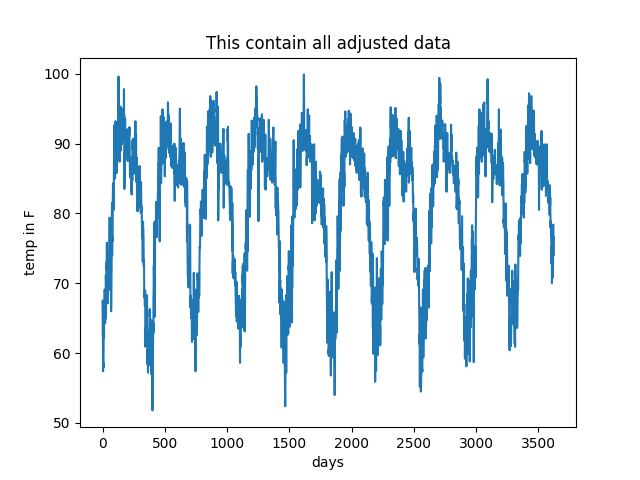

In [7]:
plt.plot(dataset['Temperature F'])
plt.xlabel("days")
plt.ylabel("temp in F")
plt.title("This contain all adjusted data")
plt.show()

<IPython.core.display.Javascript object>


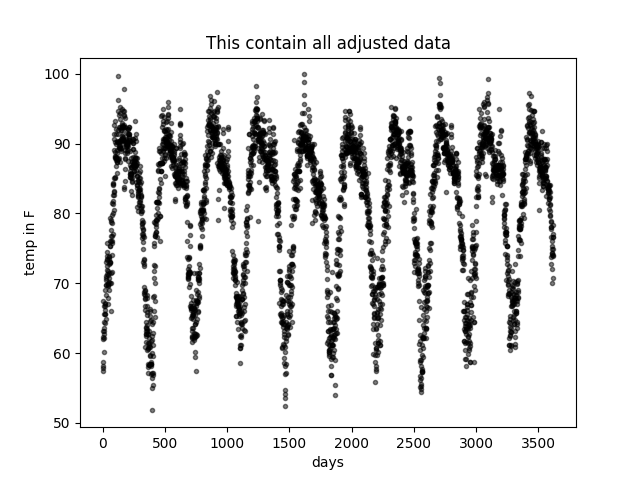

In [15]:
temps = dataset['Temperature F']
plt.plot(temps, color='black', marker='.', linestyle='None', alpha = .5 )
plt.xlabel("days")
plt.ylabel("temp in F")
plt.title("This contain all adjusted data")
plt.show()

# 2. Features

<IPython.core.display.Javascript object>


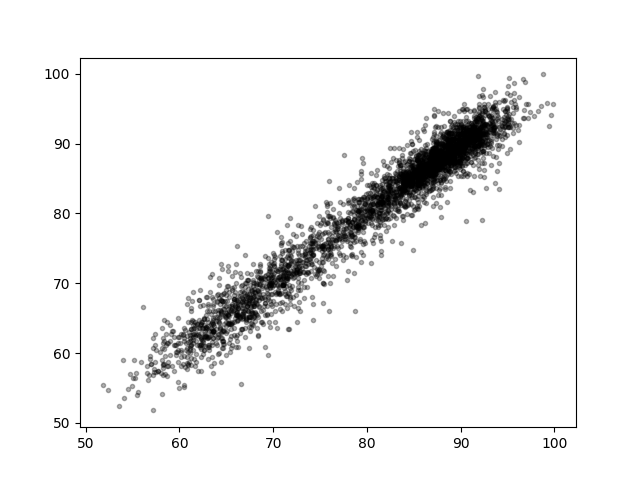

In [16]:
# Determine the wheather of previous day's temporature compared to following day.
# This graphs show positively correlated.
# Conclusion: yesterday's temporature is probably similar to previous day's temporature
plt.plot(temps[:-1], # nth day
         temps[1:],  # n-1thday
         marker='.' , color='black', alpha=0.3 ,  linestyle='None')
plt.show()

<IPython.core.display.Javascript object>


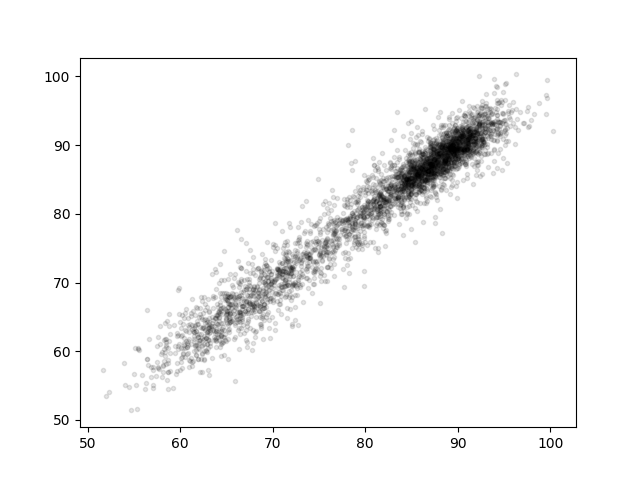

In [17]:
# Determine the wheather of previous day's temporature compared to following day with jitter(jitter; i.e; adding random noise values) technique.
# This graphs show positively correlated.
# Conclusion: yesterday's temporature is probably similar to previous day's temporature
def scatter(x, y):
    """
    x: day           > nth   day  
    y: previouse day > n-1th day 
    Make a scatter plot with jitter(jitter; i.e; random noise) to draw roughly
    """
    x_jitter = x + np.random.normal(size=x.size, scale=.5) # Thiese are first three: [91. 92. 92.] + [91.43498518 91.67032725 91.89028237]
    y_jitter = y + np.random.normal(size=y.size, scale=.5) # Thiese are first three: [91. 91. 92.] + [90.75841288 91.29637283 92.03008712]
    plt.plot(
        x_jitter, y_jitter,
        color='black',
        marker='.',
        linestyle='none',
        alpha=.1,
    )
    plt.show()
    
scatter(temps[1:], temps[:-1])

<IPython.core.display.Javascript object>


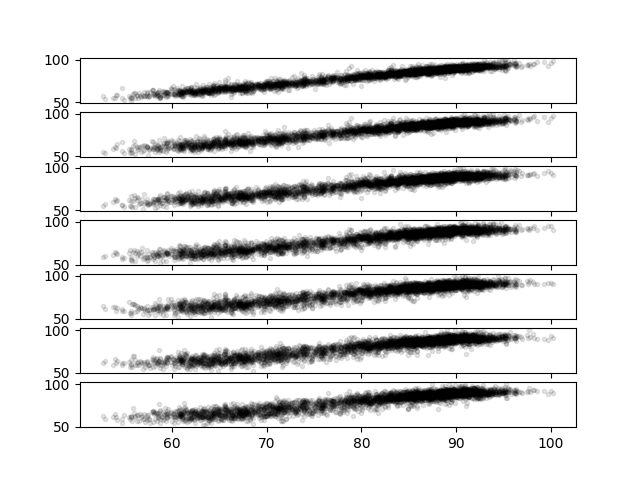

In [18]:
# These all graphs shows that  day 1 temporature is probably similar to 8th day temporature.
# shift: Temporature of Dth day is being to shifted day (D+n)th day
#   e.g; 
#       shift = 3 -> Temporature of nth day is being to shifted to (n+3)th day
# Conclusion: Shows Direct proportionality.
fig, axs = plt.subplots(7)
x = temps + np.random.normal(size=temps.size, scale=.5) # temps + jitter
y = temps + np.random.normal(size=temps.size, scale=.5) # temps + jitter
for counter, shift in enumerate(range(1, 8)):
    axs[counter].plot(x[shift:], y[:-shift],
        color='black',
        marker='.',
        linestyle='none',
        alpha=.1,) 

<IPython.core.display.Javascript object>


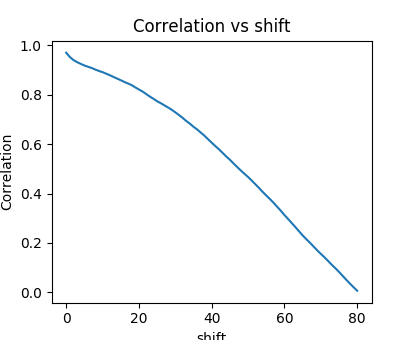

In [21]:
# Extereme High Correalation: R > 0.9, High Correalation: 0.9 <= R < 0.7, Moderate Correlation: 0.7 < r < 0.4, Low Correlation: 0 > r > 0.4 
# shift: To find the probability of temporature w.r.t shift day(i.e; day 1 w.r.t 6 day).
# Conclusion:
   # shift 1-9 days:      Extreme High correlation(0.969-0.901)
   # shift 10-33 days:    High Correlation(0.895-0.706)
   # shift 34-55 days:    Moderate Correlation(0.693-0.406)
   # shift 56-74 days:    Low Correlation(0.392-0.112)
   # shift after 75 days: No Correlation (0.0)
autocorr = []
for shift in range(1, 220):
    if np.corrcoef(x[shift:], x[:-shift])[0][1] >= 0:
#         print(f'\nday {shift}: {np.corrcoef(x[shift:], x[:-shift])[0][1]}')
        correlation = np.corrcoef(x[shift:], x[:-shift])[0][1]
        autocorr.append(correlation)

# From graph we deduce that high correlation means high precision 
# as no. of shifts included in it ,thus; added noise and graph is declining
plt.plot(autocorr)
plt.title('Correlation vs shift')
plt.ylabel('Correlation')
plt.xlabel('shift')
plt.show()

<IPython.core.display.Javascript object>


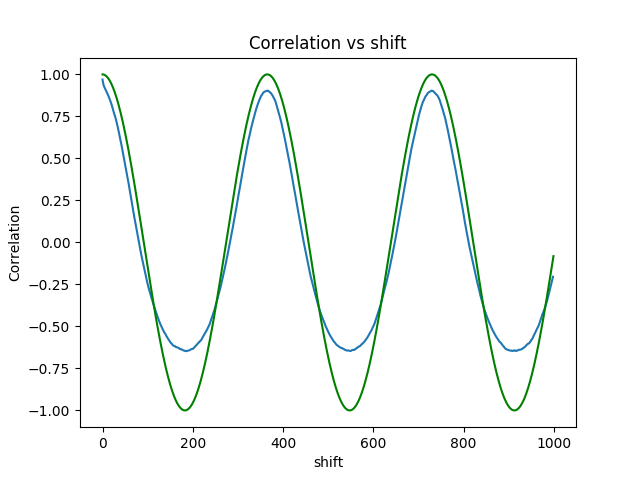

In [26]:
# This graph shows the cyclic effect of approx three years
# This graph shows negatively correlated
# Through sine wave approximation; 3rd yr of high peak more closed to 2nd or 1st yrs > Shows Temporature increased yearly

autocorr = []
for shift in range(1, 1000): # 1000 approx three year
        correlation = np.corrcoef(x[shift:], x[:-shift])[0][1]
        autocorr.append(correlation)
plt.plot(autocorr)

## Adding sine wave approximation
d = np.arange(1000) # 0-999
fit = 1.0 * np.cos(2 * np.pi * d /365) # use cos function due to graph is plotting from 0.6 position not from 0th position. 
plt.plot(d, fit, 'green')

plt.title('Correlation vs shift')
plt.ylabel('Correlation')
plt.xlabel('shift')
plt.show()

<IPython.core.display.Javascript object>


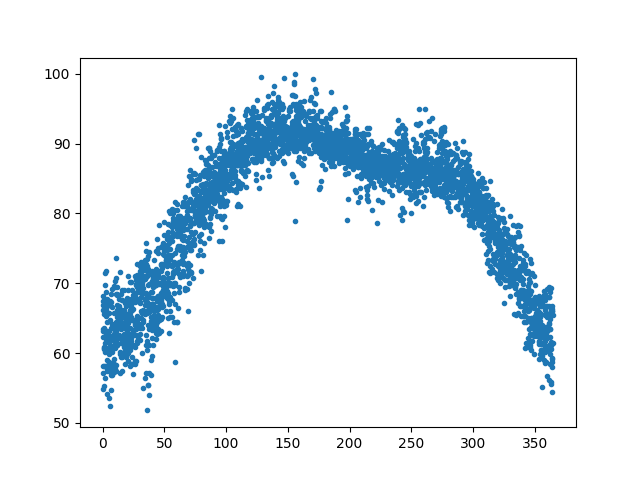

In [57]:
def find_day_of_year(year, month, day):
    """
    Convert year, month, date to day of the year.
    January 1 = 0

    Parameters
    ----------
    year: int
    month: int
    day: int

    Returns
    -------
    day_of_year: int
    """
    days_per_month = np.array([31,  28,  31,  30,  31,  30,  31,  31,  30,  31,  30, 31])
                            # jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec
                            # 0  ,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10, 11 
    # For leap years >>> 2008, 2012, 2016
    if year % 4 == 0: days_per_month[1] += 1
        
    day_of_year = np.sum(np.array(
        days_per_month[:month - 1])) + day - 1  # 8 month >> sep, sum([31 28 31 30 31 30 31]) + 6-1 = 212 
    return day_of_year

# find_day_of_year('07', 8, 6)
day_of_year = np.zeros(temps.size) # 3622 zeros
for i_row in range(temps.size): # 3622 times
    day_of_year[i_row] = find_day_of_year(    
    int(year[i_row]), int(month[i_row]), int(day[i_row]))    # year[0]=1998, month[0]=8, day[0] = 1

plt.scatter(day_of_year, temps, marker='.')

<IPython.core.display.Javascript object>


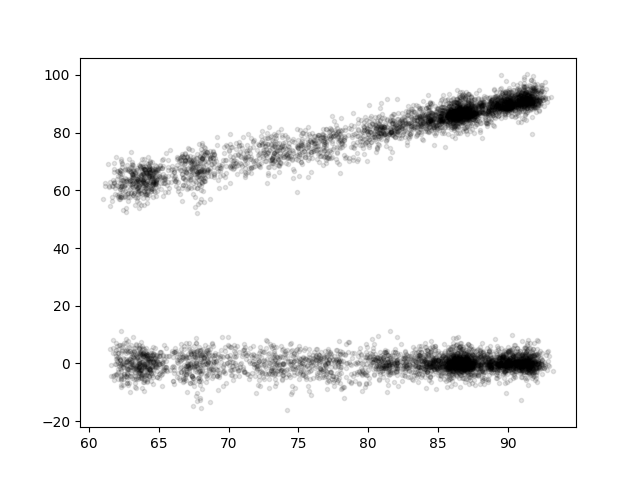

In [61]:
## Create 10-day medians for each day of the year.
median_temp_calendar = np.zeros(366)  # For leap yr contain 366 zeros
ten_day_medians = np.zeros(temps.size) # 6739 zeros
temps = np.array(temps)

for i_day in range(0, 365):
    low_day = i_day - 5 # -5 to 359
    high_day = i_day + 4 # 4 to 368
    if low_day < 0:
        low_day += 365
    if high_day > 365:
        high_day += -365
    if low_day < high_day: 
        i_window_days = np.where(
            np.logical_and(day_of_year >= low_day,    # Jan 1  >>> 0
                           day_of_year <= high_day))  # Dec 31 >>> 364
    else:
        i_window_days = np.where(
            np.logical_or(day_of_year >= low_day,
                          day_of_year <= high_day))
        
    ten_day_median = np.median(temps[i_window_days])  # 79.0
    median_temp_calendar[i_day] = ten_day_median
    ten_day_medians[np.where(day_of_year == i_day)] = ten_day_median
    
    if i_day == 364:
        ten_day_medians[np.where(day_of_year == 365)] = ten_day_median
        median_temp_calendar[365] = ten_day_median

#     print(i_window_days)
#     print(np.diff(i_window_days))

# Graph shows that strong group of obs. lies directly among 80-X & 77.5-Y Axises
scatter(ten_day_medians, temps)

# Strong group of obs. shows that obs at 90 at X axis 
scatter(ten_day_medians, temps-ten_day_medians)




<IPython.core.display.Javascript object>


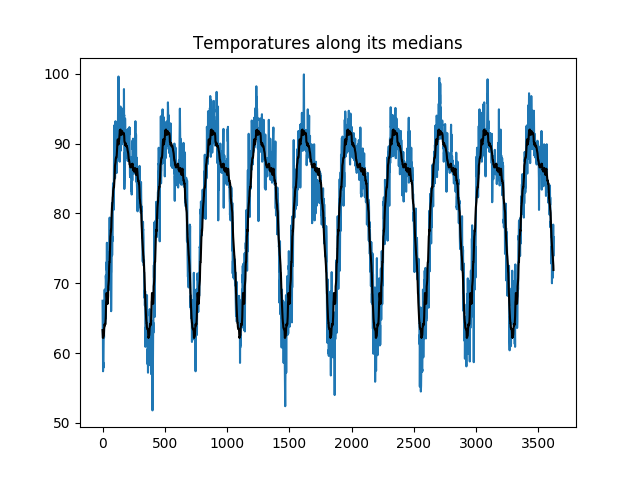

In [63]:
# The graphs shows that meidan lies inside of all obs. values of temporature
plt.plot(temps)
plt.plot(ten_day_medians, color='black')
plt.title("Temporatures along its medians")
plt.show()